# Comparing solutions of Velocity Verlet and Analytical Solution, No Drag

#### We compare our numerical integration using Velocity Verlet to an analytical solution in order to compare the accuracy of our method to the "true" solution. Both methods below have the same initial conditions and plot one orbit around Jupiter, assuming no drag.

#### Our initial conditions are listed below:

$$\begin{equation}
\mu = 0.126687 * 10^9 \ \ \ [\dfrac{kg^3}{s^2}]
\end{equation}$$
$$\begin{equation}
r_o = \begin{bmatrix} 100000.0, & 0., & 0. \end{bmatrix} \ \ \ [km]
\end{equation}$$
$$\begin{equation}
v_o \approx \begin{bmatrix} 0., & 35.59, & 0. \end{bmatrix} \ \ \ [\dfrac{m}{s}]
\end{equation}$$

#### We calculated the final time using the period equation:

$$\begin{equation}
t_f = 2\pi\sqrt(\dfrac{||r_o||)^3}{\mu})
\end{equation}$$

#### Below is our implementation of Velocity Verlet with our initial conditions:

# Velocity Verlet Numerical Implementation - No Drag, One Orbit

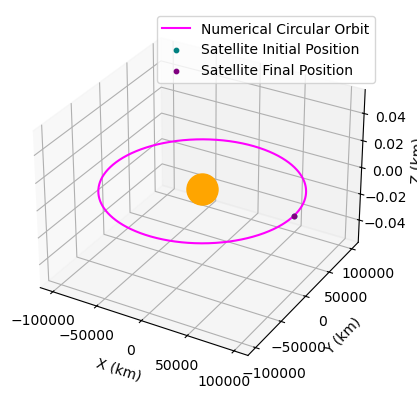

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Constants and Parameters
mu = 0.126687e9  # km^3/s^2, grav parameter

# Initial Conditions
r_o = np.array([100000.0, 0.0, 0.0])  # km, initial position
v_circ = np.sqrt(mu / np.linalg.norm(r_o))
v_o = np.array([0.0, v_circ, 0.0])     # km/s, initial velocity
t_o = 0                               # s, start time
#t_f = 17652.84256  s, end time (~5 hrs)
t_f = 2*np.pi*np.sqrt(np.linalg.norm(r_o)**3/mu) # actual proper way to calculate period
dt = 10.0                             # time step in seconds
Y_o = np.hstack([r_o, v_o])           # state vector

# Equation of Motion (used for acceleration computation)
def EOM(t, Y):
    r_vec = Y[:3]
    Ydot = np.zeros_like(Y)
    Ydot[:3] = Y[3:]
    r = np.linalg.norm(r_vec)
    a_vec = -mu * r_vec / r**3
    Ydot[3:] = a_vec
    return Ydot

# Velocity Verlet Implementation
def velocity_verlet(r0, v0, t0, tf, dt):
    N = int((tf - t0) / dt) + 1
    r = np.zeros((N, 3))
    v = np.zeros((N, 3))
    t = np.linspace(t0, tf, N)

    r[0] = r0
    v[0] = v0

    # Initial acceleration
    a = -mu * r[0] / np.linalg.norm(r[0])**3

    for i in range(N - 1):
        # Position update
        r[i + 1] = r[i] + v[i] * dt + 0.5 * a * dt**2

        # Compute new acceleration
        a_new = -mu * r[i + 1] / np.linalg.norm(r[i + 1])**3

        # Velocity update
        v[i + 1] = v[i] + 0.5 * (a + a_new) * dt

        # Update acceleration for next step
        a = a_new

    return t, r, v

# Run the Velocity Verlet method
t, r, v = velocity_verlet(r_o, v_o, t_o, t_f, dt)

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]

# Plotting the 3D orbit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Numerical Circular Orbit', color='magenta')
ax.scatter(x[0], y[0], z[0], color="teal", s=10, label="Satellite Initial Position")
ax.scatter(x[-1], y[-1], z[-1], color="purple", s=10, label="Satellite Final Position")
ax.scatter(0, 0, 0, color='orange', s=500) #Jupiter
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.legend()
ax.grid(True)
#plt.tight_layout()
plt.show()

#### Using our method, we can see that our initial and final position is the same and we have a perfectly circular orbit. Now we will plot our analytical solution with the same initial conditions and no drag:

# Keplerian Analytical Solution - No Drag, One Orbit

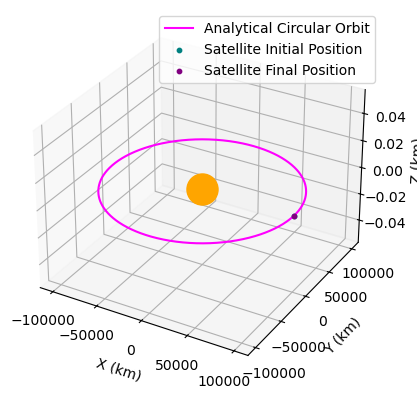

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu = 0.126687e9  # km^3/s^2, Jupiter's gravitational parameter

# Initial conditions for a circular orbit
r_initial_analytical = np.array([100000.0, 0.0, 0.0])  # km
r = np.linalg.norm(r_initial_analytical)  # Semi-major axis (same as radius in a circular orbit)

# Compute the orbital angular velocity
omega = np.sqrt(mu / r**3)  # rad/s

# Time settings
t_f = 17652.84256  # s, 5 hrs
t_values = np.linspace(0, t_f, 1000)  # Generate time steps

# Compute analytical position over time
x_analytical = r * np.cos(omega * t_values)
y_analytical = r * np.sin(omega * t_values)
z_analytical = np.zeros_like(t_values)  # Orbit is in the XY plane

# Plot the analytical orbit
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_analytical, y_analytical, z_analytical, color='magenta', label="Analytical Circular Orbit")
ax.scatter(x[0], y[0], z[0], color="teal", s=10, label="Satellite Initial Position")
ax.scatter(x[-1], y[-1], z[-1], color="purple", s=10, label="Satellite Final Position")
ax.scatter(0, 0, 0, color='orange', s=500, marker='o')
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.legend()
plt.show()

#### Comparing our graphs for the numerical and analytical solutions, they look exactly the same. The shows that our numerical method with no drag and one orbit around Jupiter is a good method to use to plot the orbit of a satellite around Jupiter, assuming there is no drag.